In [0]:
import tensorflow as tf
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 421.8MB 30kB/s 


In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
with zipfile.ZipFile('//content/drive/My Drive/chest_xray.zip', 'r') as zip_ref: zip_ref.extractall('')

In [0]:
import cv2

In [0]:
img = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')   

In [0]:
X_test = []
Y_test = []
import os
import numpy as np
images_name = os.listdir('/content/chest_xray/test/NORMAL')
for i in range(len(images_name)):
  try:
      img = cv2.imread('/content/chest_xray/test/NORMAL/' + images_name[i])
      # print(img.shape)
      img = cv2.resize(img, (256, 256))
      X_test.append(img)
      Y_test.append(1)
  except:
    pass

images_name = os.listdir('/content/chest_xray/test/PNEUMONIA')
for i in range(len(images_name)):
  try:
      img = cv2.imread('/content/chest_xray/test/PNEUMONIA/' + images_name[i])
      # print(img.shape)
      img = cv2.resize(img, (256, 256))
      X_test.append(img)
      Y_test.append(0)
  except:
    pass

In [0]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
X_train = []
Y_train = []
import os
import numpy as np
images_name = os.listdir('/content/chest_xray/train/NORMAL')
for i in range(len(images_name)):
  try:
      img = cv2.imread('/content/chest_xray/train/NORMAL/' + images_name[i])
      # print(img.shape)
      img = cv2.resize(img, (256, 256))
      X_train.append(img)
      Y_train.append(1)
  except:
    pass

images_name = os.listdir('/content/chest_xray/train/PNEUMONIA')
for i in range(len(images_name)):
  try:
      img = cv2.imread('/content/chest_xray/train/PNEUMONIA/' + images_name[i])
      # print(img.shape)
      img = cv2.resize(img, (256, 256))
      X_train.append(img)
      Y_train.append(0)
  except:
    pass

In [0]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [0]:
X_train.shape

(5216, 256, 256, 3)

In [0]:
X_test.shape

(624, 256, 256, 3)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# Compile the keras model     for multiclass, the loss is categorical cross entroy and for binary, it is binary cross entropy
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
%%time
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data = (X_test, Y_test))

Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 11.0276 - accuracy: 0.8043 - val_loss: 0.6767 - val_accuracy: 0.6250
Epoch 2/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 0.1362 - accuracy: 0.9490 - val_loss: 0.6717 - val_accuracy: 0.6250
Epoch 3/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 0.0989 - accuracy: 0.9645 - val_loss: 0.6762 - val_accuracy: 0.6250
Epoch 4/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.6751 - val_accuracy: 0.6250
Epoch 5/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 0.2390 - accuracy: 0.9122 - val_loss: 0.6548 - val_accuracy: 0.6250
Epoch 6/10
5216/5216 [==============================] - 26s 5ms/sample - loss: 0.2023 - accuracy: 0.9206 - val_loss: 0.6583 - val_accuracy: 0.6362
Epoch 7/10
5216/5216 [==============================] - 26s 5ms/sample

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
train_data_dir = '/content/chest_xray/train'
validation_data_dir = '/content/chest_xray/test'

In [11]:
epoch = 10
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir, target_size=(256, 256), batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir, target_size=(256, 256), batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
# Compile the keras model     for multiclass, the loss is categorical cross entroy and for binary, it is binary cross entropy
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
%%time
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.n // batch_size,
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)

Epoch 1/10
81/81 [==============================] - 127s 2s/step - loss: 0.5262 - acc: 0.7438 - val_loss: 0.4686 - val_acc: 0.7795
Epoch 2/10
81/81 [==============================] - 125s 2s/step - loss: 0.2954 - acc: 0.8748 - val_loss: 0.3705 - val_acc: 0.8438
Epoch 3/10
81/81 [==============================] - 124s 2s/step - loss: 0.2268 - acc: 0.9076 - val_loss: 0.5861 - val_acc: 0.7170
Epoch 4/10
81/81 [==============================] - 122s 2s/step - loss: 0.2009 - acc: 0.9204 - val_loss: 0.3704 - val_acc: 0.8559
Epoch 5/10
81/81 [==============================] - 121s 1s/step - loss: 0.1891 - acc: 0.9239 - val_loss: 0.4544 - val_acc: 0.8299
Epoch 6/10
81/81 [==============================] - 121s 1s/step - loss: 0.1772 - acc: 0.9323 - val_loss: 0.3430 - val_acc: 0.8976
Epoch 7/10
81/81 [==============================] - 123s 2s/step - loss: 0.1625 - acc: 0.9383 - val_loss: 0.4128 - val_acc: 0.8681
Epoch 8/10
81/81 [==============================] - 121s 1s/step - loss: 0.1634 - a

In [0]:
img = image.load_img('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg', target_size = (256, 256))

In [26]:
img = np.array(img)
img = np.expand_dims(img, axis = 0)
model.predict(img)

array([[0.]], dtype=float32)

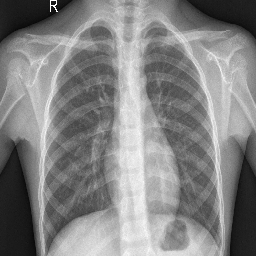

In [19]:
img